# L'analyse des données

In [5]:
# Import package
import numpy as np
import pandas as pd

## Sélectionner la donnée

In [6]:
# Créeons une liste à 2D
data_list = [
    [ 0,  1,  2,  3,  4],
    [10, 11, 12, 13, 14],
    [20, 21, 22, 23, 24],
    [30, 31, 32, 33, 34],
    [40, 41, 42, 43, 44],
]

data_np = np.array(data_list)
data_np

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

### Les lignes (rows)

In [7]:
# data_np[row(s), column(s)]
data_np[0] # [ 0,  1,  2,  3,  4]
data_np[:2] # [[ 0,  1,  2,  3,  4], [10, 11, 12, 13, 14]]
data_np[1:3] # [[10, 11, 12, 13, 14], [20, 21, 22, 23, 24]]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

### Les colonnes (columns)

In [8]:
# data_np[row(s), column(s)]
data_np[:,0] # [ 0, 10, 20, 30, 40]
data_np[2:,0] # [20, 30, 40]
data_np[2,0] # 20

20

### La sélection par étape

In [9]:
# np_array[start:stop:step]
data_np[0][0:4:2] # [0, 2]

array([0, 2])

## Manipuler la donnée

### La vectorisation

In [10]:
# La vectorisation la méthode la plus rapide et la moins gourmande en mémoire pour manipuler la donnée d'un 
# np_array ou d'un DataFrame comparé à une itération issue de 'for loop', '.apply()' ou '.map'
my_list = [
    [6, 5],
    [1, 3],
    [5, 6],
    [1, 4],
    [3, 7],
    [5, 8],
    [3, 5],
    [8, 4],
]

my_list_np = np.array(my_list)

my_sum = my_list_np[:, 0] + my_list_np[:, 1] # vectorial "+" operator
my_sum

array([11,  4, 11,  5, 10, 13,  8, 12])

### Le boolean indexing

In [11]:
my_list_np[my_list_np == 5] = 99
my_list_np

array([[ 6, 99],
       [ 1,  3],
       [99,  6],
       [ 1,  4],
       [ 3,  7],
       [99,  8],
       [ 3, 99],
       [ 8,  4]])

### Le regroupement

In [12]:
df = pd.DataFrame({'Student Names' : ['Jenny', 'Singh', 'Charles', 'Richard', 'Veena'],
                   'Category' : ['Online', 'Offline', 'Offline', 'Offline', 'Online'],
                   'Gender' : ['Female', 'Male', 'Male', 'Male', 'Female'],
                  'Courses': ['Java', 'Spark', 'PySpark','Hadoop','C'],
                   'Fee': [15000, 17000, 27000, 29000, 12000],
                   'Discount': [1100, 800, 1000, 1600, 600]})
df

,Student Names,Category,Gender,Courses,Fee,Discount
0,Jenny,Online,Female,Java,15000,1100
1,Singh,Offline,Male,Spark,17000,800
2,Charles,Offline,Male,PySpark,27000,1000
3,Richard,Offline,Male,Hadoop,29000,1600
4,Veena,Online,Female,C,12000,600


#### df.groupby()

In [13]:
# La méthode '.groupby()' permet de regrouper un DataFrame en fonction des colonnes sélectionner. Cette méthode
# s'applique toujours avec une méthode d'agrrégation
df.groupby(['Gender','Student Names']).mean() # count(), max(), min(), sum()

Fee  Discount
Gender Student Names                   
Female Jenny          15000.0    1100.0
       Veena          12000.0     600.0
Male   Charles        27000.0    1000.0
       Richard        29000.0    1600.0
       Singh          17000.0     800.0

#### df.pivot_table()

In [14]:
# La méthode '.pivot' permet de faire pivoter un tableau en fonction des valeurs des colonnes
pd.pivot(df, index='Student Names', columns="Category")

Gender          Courses             Fee          Discount  \
Category      Offline  Online  Offline Online  Offline   Online  Offline   
Student Names                                                              
Charles          Male     NaN  PySpark    NaN  27000.0      NaN   1000.0   
Jenny             NaN  Female      NaN   Java      NaN  15000.0      NaN   
Richard          Male     NaN   Hadoop    NaN  29000.0      NaN   1600.0   
Singh            Male     NaN    Spark    NaN  17000.0      NaN    800.0   
Veena             NaN  Female      NaN      C      NaN  12000.0      NaN   

                       
Category       Online  
Student Names          
Charles           NaN  
Jenny          1100.0  
Richard           NaN  
Singh             NaN  
Veena           600.0

### Multiple files

In [15]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['a', 3], ['b', 4]], columns=['letter', 'number'])

#### pd.concat()

In [16]:
# Utiliser '.concat()' va créer un nouveau DataFrame avec les DFs les uns après les autres sans changer les index
pd.concat([df1,df2])
pd.concat([df1,df2], ignore_index=True) # le résultat sera le même mais le nouveau DataFrame sera re-indexé

,letter,number
0,a,1
1,b,2
2,a,3
3,b,4


#### pd.DataFrame.merge()

In [17]:
# Le '.merge()' va se comporter comme une requête SQL JOIN, le nouveau DataFrame sera une fusion des DFs 
# sur la key sélectionnée
df1.merge(df2, on="letter", how="inner") # outer, left, right

,letter,number_x,number_y
0,a,1,3
1,b,2,4


#### pd.DataFrame.join()

In [18]:
# Le '.join()' va se comporter comme le '.merge()' à la différence près que la fusion ne se fait pas sur une
# key en particulier mais sur chacune de chaque DF
df1.join(df2, lsuffix='_df1', rsuffix='_df2')

,letter_df1,number_df1,letter_df2,number_df2
0,a,1,a,3
1,b,2,b,4


# Visualisation de la donnée

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ressources

- [Exemples de plot](https://matplotlib.org/stable/gallery/index.html)
- [Matplotlib cheatsheet](https://matplotlib.org/cheatsheets/cheatsheets.pdf)
- [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [Quel plot utiliser ?](https://www.data-to-viz.com/#histogram)
- [Quelles sont les erreurs à éviter](https://www.data-to-viz.com/caveats.html)

In [20]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [21]:
youtube = pd.read_csv('https://gist.githubusercontent.com/ssaunier/8044d6a7267223787ed143d0973e3ec6/raw/youtube.csv')

In [22]:
years_x = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
total_y = [1243, 1543, 1619, 1831, 1960, 2310, 2415, 2270, 1918]
coal_y = [823, 1136, 1367, 1547, 1660, 1927, 1983, 1827, 1352]
gas_y = [171, 200, 166, 175, 228, 280, 319, 399, 529]

In [23]:
df_co2 = pd.DataFrame({ 'coal': coal_y, 'gas': gas_y }, index=years_x)

In [24]:
print(sorted(plt.style.available))

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Les plots

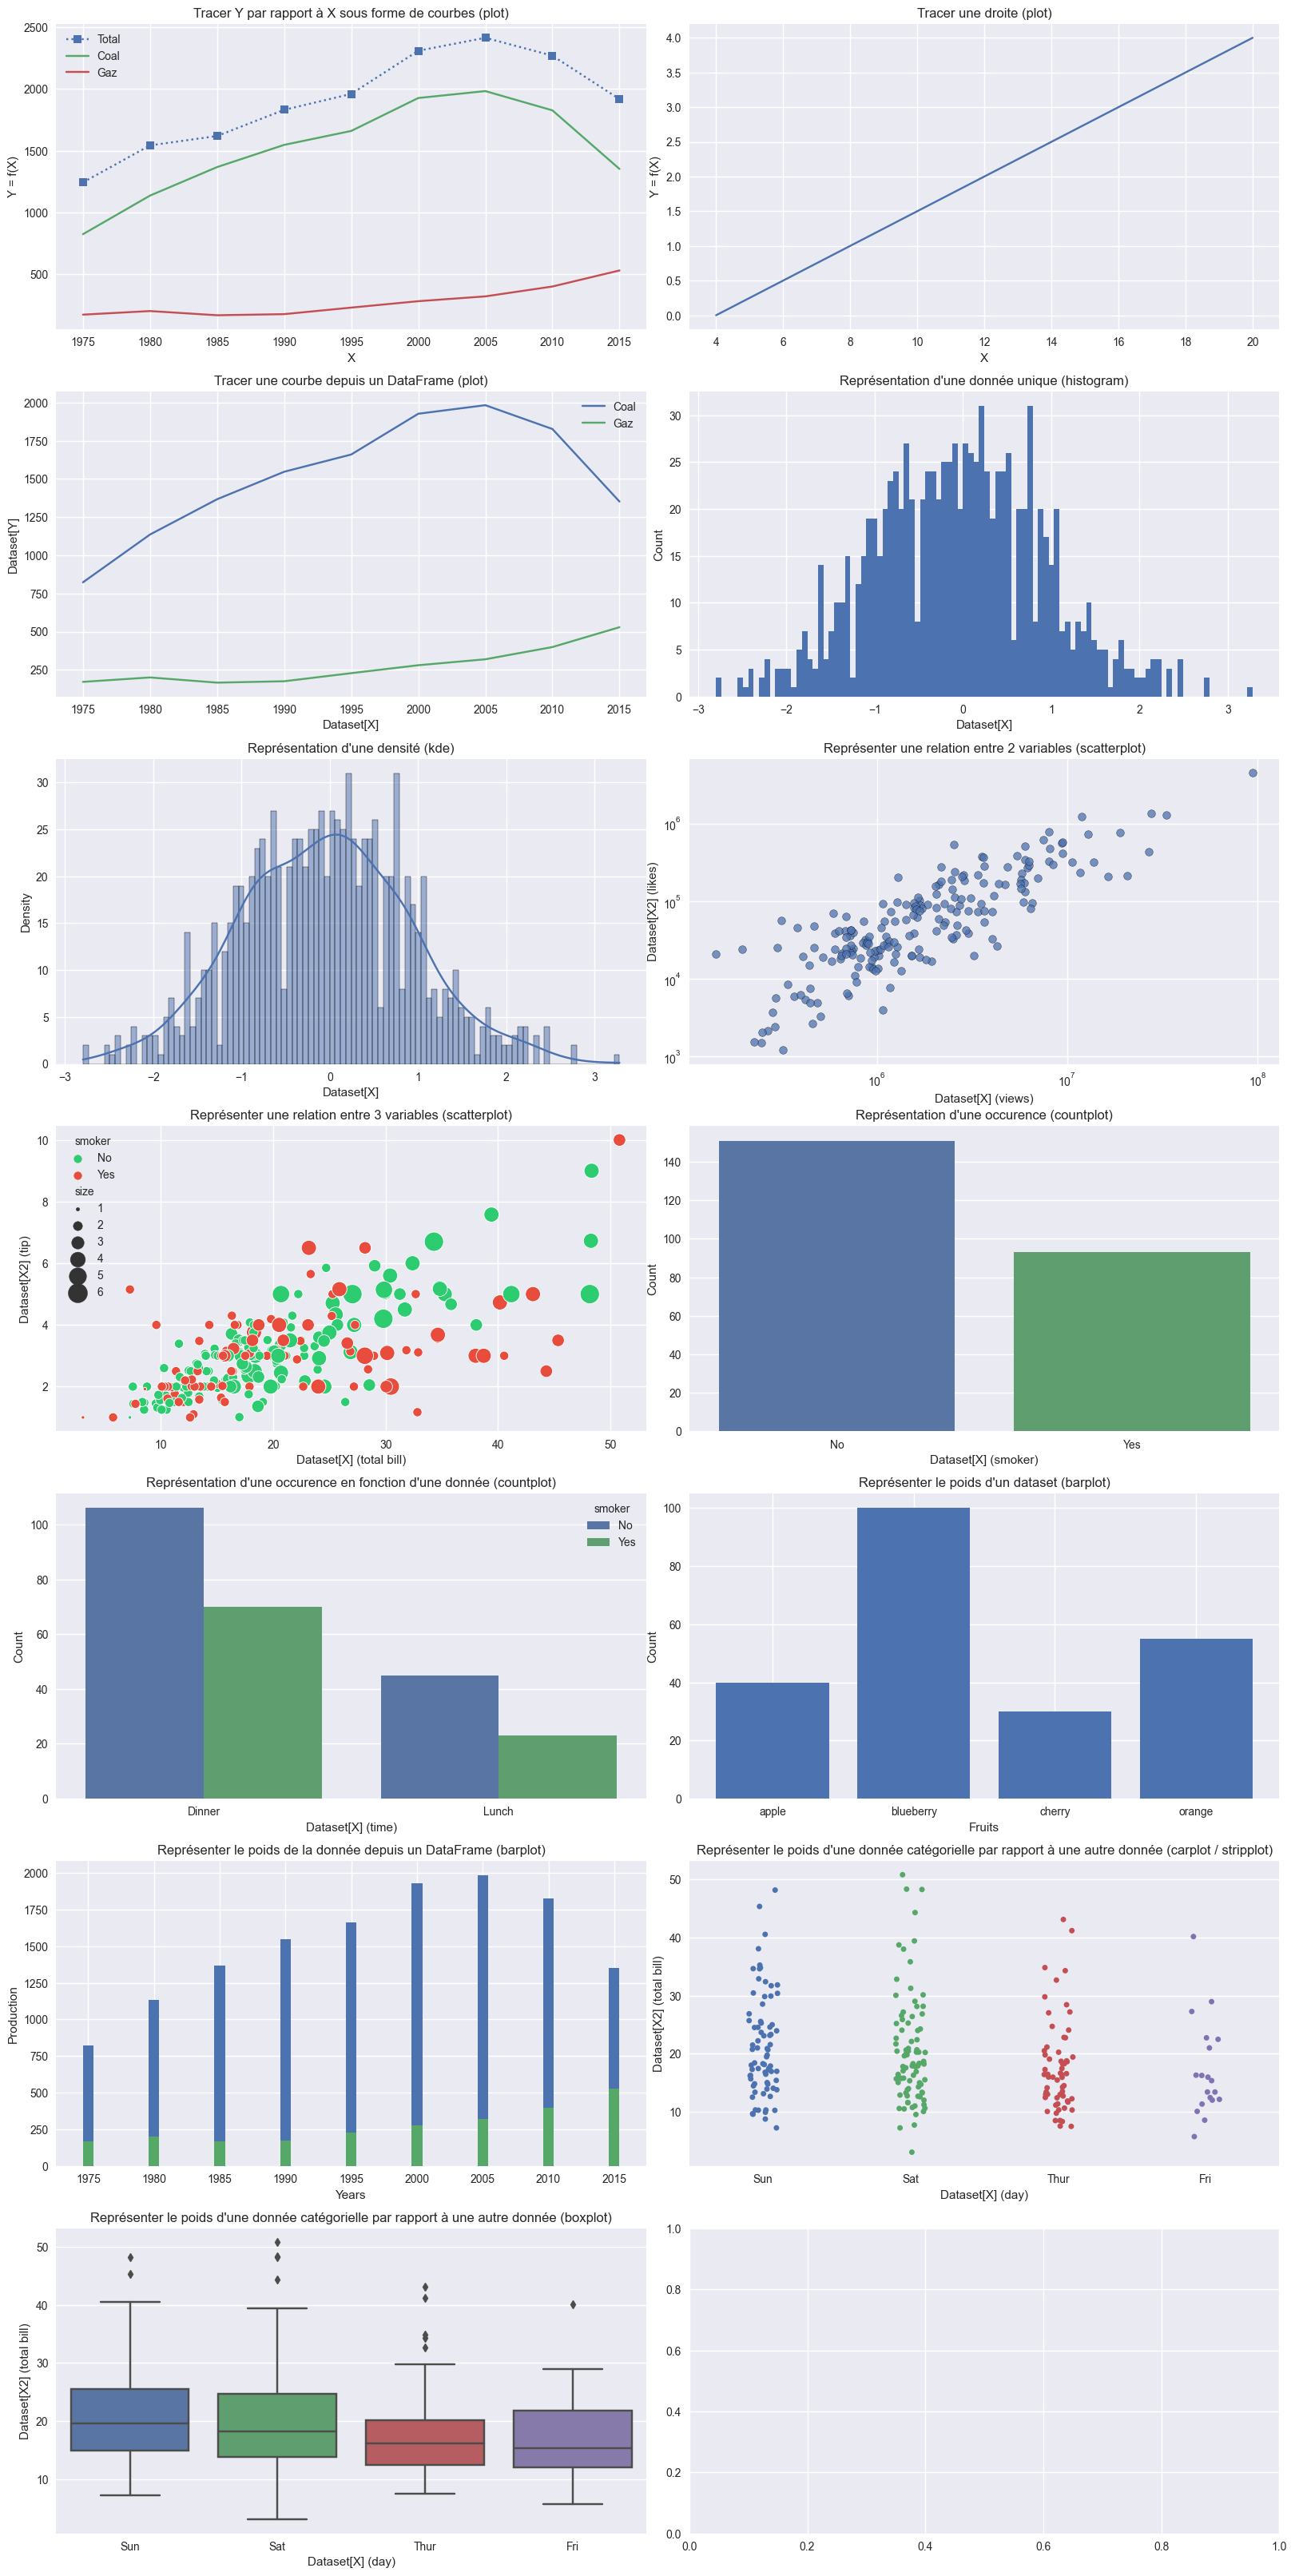

In [25]:
with plt.style.context('seaborn'): # permet d'appliquer un style à notre plot
    # On peut déterminer la taille de la figure
    #plt.figure(figsize=(12,30));
    
    # On peut créer une grille avec les différents plots
    fig, axes = plt.subplots(7, 2,figsize=(16, 32));
    fig.tight_layout(h_pad=3.5);
    
    # Tracer une courbe entre deux datasets de forme identique
    axes[0,0].plot(years_x, total_y, label="Total", linestyle=':', marker='s') 
    axes[0,0].plot(years_x, coal_y, label="Coal")
    axes[0,0].plot(years_x, gas_y, label="Gaz")
    axes[0,0].legend(loc='best')
    axes[0,0].set_title('Tracer Y par rapport à X sous forme de courbes (plot)')
    axes[0,0].set_xlabel("X")
    axes[0,0].set_ylabel("Y = f(X)")
    
    # Tracer une droite
    axes[0,1].plot([4,20],[0,4])
    axes[0,1].set_title('Tracer une droite (plot)')
    axes[0,1].set_xlabel("X")
    axes[0,1].set_ylabel("Y = f(X)")
    
    # Tracer une courbe depuis un DataFrame
    x = df_co2.index.values
    cy = df_co2.coal
    gy = df_co2.gas
    axes[1,0].plot(x, cy, label="Coal")
    axes[1,0].plot(x, gy, label="Gaz")
    axes[1,0].legend(loc='best')
    axes[1,0].set_title('Tracer une courbe depuis un DataFrame (plot)')
    axes[1,0].set_xlabel("Dataset[X]")
    axes[1,0].set_ylabel("Dataset[Y]")
    
    # Tracer une représentation graphique d'une donnée unique et découpée en 'bins'
    x_normal = np.random.normal(size=1000)
    axes[1,1].hist(x_normal, bins=100)
    axes[1,1].set_title('Représentation d\'une donnée unique (histogram)')
    axes[1,1].set_xlabel("Dataset[X]")
    axes[1,1].set_ylabel("Count")
    
    # Tracer la densité (kde) d'une donnée unique
    sns.histplot(x_normal, bins=100, kde=True, ax=axes[2,0])
    axes[2,0].set_title('Représentation d\'une densité (kde)')
    axes[2,0].set_xlabel("Dataset[X]")
    axes[2,0].set_ylabel("Density")
    
    # Représenter une relation entre 2 variables numériques
    axes[2,1].scatter(youtube['views'], youtube['likes'], edgecolor='#000', alpha=0.75)
    axes[2,1].set_title('Représenter une relation entre 2 variables (scatterplot)')
    axes[2,1].set_xlabel('Dataset[X] (views)')
    axes[2,1].set_ylabel('Dataset[X2] (likes)')
    axes[2,1].set_xscale('log')
    axes[2,1].set_yscale('log')
    
    sns.scatterplot(x="total_bill", y="tip", hue='smoker', size="size",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),sizes=(10, 300), data=tips_df, ax=axes[3,0])
    axes[3,0].set_title('Représenter une relation entre 3 variables (scatterplot)')
    axes[3,0].set_xlabel('Dataset[X] (total bill)')
    axes[3,0].set_ylabel('Dataset[X2] (tip)')
    
    # Représenter une occurence
    sns.countplot(x="smoker", data=tips_df, ax=axes[3,1])
    axes[3,1].set_title('Représentation d\'une occurence (countplot)')
    axes[3,1].set_xlabel("Dataset[X] (smoker)")
    axes[3,1].set_ylabel("Count")
    
    sns.countplot(x="time", hue="smoker", data=tips_df, ax=axes[4,0])
    axes[4,0].set_title('Représentation d\'une occurence en fonction d\'une donnée (countplot)')
    axes[4,0].set_xlabel("Dataset[X] (time)")
    axes[4,0].set_ylabel("Count")
    
    # Représenter le poids d'un dataset
    fruits = ['apple', 'blueberry', 'cherry', 'orange']
    counts = [40, 100, 30, 55]
    axes[4,1].bar(fruits, counts)
    axes[4,1].set_title('Représenter le poids d\'un dataset (barplot)')
    axes[4,1].set_xlabel('Fruits')
    axes[4,1].set_ylabel('Count')
    
    axes[5,0].bar(x,cy)
    axes[5,0].bar(x,gy)
    axes[5,0].set_title('Représenter le poids de la donnée depuis un DataFrame (barplot)')
    axes[5,0].set_xlabel('Years')
    axes[5,0].set_ylabel('Production')
    
    # Représenter le poids d'une donnée catégorielle par rapport à une autre donnée
    #sns.catplot(x='day', y='total_bill', data=tips_df) catplot n'accepte pas de cible 'axes'
    sns.stripplot(x='day', y='total_bill', data=tips_df, ax=axes[5,1])
    axes[5,1].set_title('Représenter le poids d\'une donnée catégorielle par rapport à une autre donnée (carplot / stripplot)')
    axes[5,1].set_xlabel('Dataset[X] (day)')
    axes[5,1].set_ylabel('Dataset[X2] (total bill)')
    
    sns.boxplot(x='day', y='total_bill', data=tips_df, ax=axes[6,0])
    axes[6,0].set_title('Représenter le poids d\'une donnée catégorielle par rapport à une autre donnée (boxplot)')
    axes[6,0].set_xlabel('Dataset[X] (day)')
    axes[6,0].set_ylabel('Dataset[X2] (total bill)')
        
    plt.show();

## Identifier rapidement les corrélations

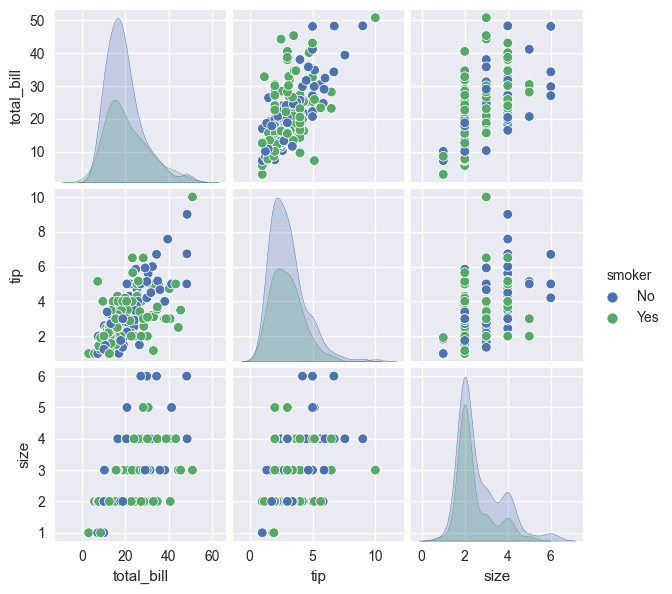

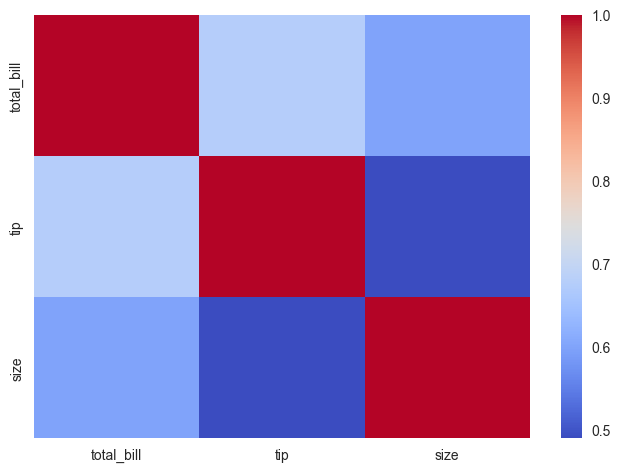

In [26]:
with plt.style.context('seaborn'):
    sns.pairplot(tips_df, hue="smoker", height=2)
    plt.show();

with plt.style.context('seaborn'):
    sns.heatmap(tips_df.corr(), cmap='coolwarm')
    plt.show();

## Cheatsheet

In [27]:
# DISTRIBUTIONS
# sns.jointplot()

# SCATTER PLOTS
# sns.regplot()

# CAT PLOTS
# sns.violinplot()

## 2D HISTOGRAMS
# plt.hist2d()
# plt.colorbar()
# sns.jointplot(x,y, kind='kde', data=df)

## 2D PROJECTION
# plt.contour(X,Y,Z) # iso lines
# plt.contourf(X,Y,Z=f(X,Y)) # area colors